In [5]:
import platform
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [1]:
# 서울시 청소년 정신건강 분석
# 작은 프로젝트를 통해서 전체적인 데이터 분석의 흐름을 익힌다.
# pandas, matplotlib

!pip install xlrd

In [7]:
import pandas as pd

rep=pd.read_excel('Report.xls',header=1) # header는 시작되는 행의 번호
rep

,기간,구분,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [9]:
col_names= ['스트레스','스트레스남학생','스트레스여학생','우울감경험률','우울남학생','우울여학생','자살생각률','자살남학생','자살여학생']
raw_data=pd.read_excel('Report.xls',header=1,
                usecols='C:K',
                names=col_names)
raw_data

#결과가 반만 존재한다. 예를 들면 스트레스를 받은 적이 있나? 대한 '그렇다'라는 답변, '아니다'의 결과가 없다.

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [11]:
raw_data.loc[1] = 100.-raw_data.loc[0]

raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [15]:
raw_data['응답']=['그렇다','아니다']
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생,응답
응답,,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [17]:
raw_data.set_index('응답',drop=True,inplace=True) #특정 열을 인덱스로 강제로 만들기
raw_data                    #drop: 원래 인덱스 값을 컬럼으로 만들지 아니면 삭제
                            #inplace: raw_data의 내용을 갱신할 것인지 결정.

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


<AxesSubplot:ylabel='스트레스'>

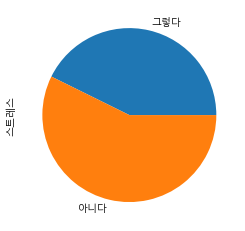

In [21]:
import matplotlib.pyplot as plt

raw_data['스트레스'].plot.pie()

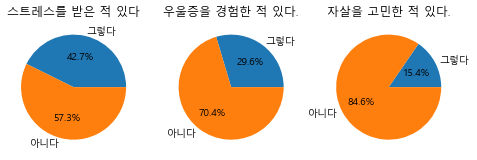

In [18]:
l=['스트레스를 받은 적 있다','우울증을 경험한 적 있다.','자살을 고민한 적 있다.']

plt.subplot(1,3,1)
raw_data['스트레스'].plot.pie(autopct='%.1f%%',title=l[0],figsize=(8,8),ylabel='')
plt.subplot(1,3,2)
raw_data['우울감경험률'].plot.pie(autopct='%.1f%%',title=l[1],figsize=(8,8),ylabel='')
plt.subplot(1,3,3)
raw_data['자살생각률'].plot.pie(autopct='%.1f%%',title=l[2],figsize=(8,8),ylabel='')

plt.show()

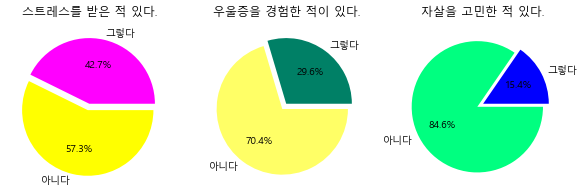

In [19]:
f,ax=plt.subplots(1,3,figsize=(10,5))

raw_data['스트레스'].plot.pie(ax=ax[0], autopct='%.1f%%',explode=[0,0.1],cmap='spring')
ax[0].set_title('스트레스를 받은 적 있다.')
ax[0].set_ylabel('')

raw_data['우울감경험률'].plot.pie(ax=ax[1],autopct='%.1f%%',explode=[0,0.1],cmap='summer')
ax[1].set_title('우울증을 경험한 적이 있다.')
ax[1].set_ylabel('')

raw_data['자살생각률'].plot.pie(ax=ax[2],autopct='%.1f%%',explode=[0,0.1],cmap='winter')
ax[2].set_title('자살을 고민한 적 있다.')
ax[2].set_ylabel('')

plt.show()


In [21]:
#운동량 데이터 분석
# for if list table

import pandas as pd
practice = pd.DataFrame({'날짜':[],'운동':[],'양':[]})
practice

,날짜,운동,양


In [82]:
practice.loc[0] =['2021/10/05','달리기',1.]
practice.loc[1] =['2021/10/05','걷기',1.]
practice.loc[2] =['2021/10/05','달리기',1.]
practice.loc[3] =['2021/10/05','계단',1.5]
practice.loc[4] =['2021/10/05','수영',1.]
practice.loc[5] =['2021/10/05','자전거',1.]



practice

,날짜,운동,양
0,2021/10/05,달리기,1.0
1,2021/10/05,걷기,1.0
2,2021/10/05,달리기,1.0
3,2021/10/05,계단,1.5
4,2021/10/05,수영,1.0
5,2021/10/05,자전거,1.0


In [83]:
practice.to_csv('practice.csv',encoding='utf-8')

In [84]:
practices=pd.read_csv('practice.csv',index_col=0)

In [85]:
practices.pivot_table(index='운동')

,양
운동,
걷기,1.0
계단,1.5
달리기,1.0
수영,1.0
자전거,1.0


In [ ]:
practices.pivot_table('날짜','운동','양')

In [22]:
seoul= pd.read_excel('seoul.xls')
seoul

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,2019,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,2019,연령별,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,2019,연령별,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,2019,연령별,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6
9,2019,학력별,중졸 이하,24.7,6.2,4.8,48.6,7.3,8.5


In [89]:
seoul.drop(columns='기간',inplace=True)

In [ ]:
seoul

In [ ]:
seoul.drop(index=range(22,52),inplace=True)

In [28]:
seoul

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,2019,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,2019,연령별,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,2019,연령별,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,2019,연령별,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6
9,2019,학력별,중졸 이하,24.7,6.2,4.8,48.6,7.3,8.5


In [24]:
seoul_s=seoul[seoul['대분류']=='성별'].copy() 
seoul_s

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7


In [104]:
seoul_s.drop(columns='대분류',inplace=True)

KeyError: "['대분류'] not found in axis"

In [108]:
seoul_s.set_index("분류",inplace=True)

seoul_s

KeyError: "None of ['분류'] are in the columns"

In [109]:
seoul_s

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
분류,,,,,,
남자,52.4,4.4,4.9,32.4,4.9,1.1
여자,42.5,5.6,3.9,41.0,5.4,1.7


<AxesSubplot:title={'center':'함께 운동을 할 사람이 없어서'}, ylabel='함께 운동을 할 사람이 없어서'>

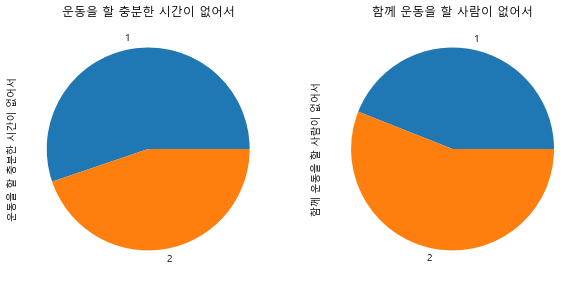

In [29]:
f,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[1].set_title('함께 운동을 할 사람이 없어서')
seoul_s['운동을 할 충분한 시간이 없어서'].plot.pie(ax=ax[0])
seoul_s['함께 운동을 할 사람이 없어서'].plot.pie(ax=ax[1])



In [116]:
seoul_age=seoul[seoul['대분류']=='연령별'].copy()
seoul_age

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,2019,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2
6,2019,연령별,40대,54.1,3.9,2.9,35.5,3.3,0.4
7,2019,연령별,50대,46.1,6.2,4.5,36.8,5.6,0.8
8,2019,연령별,60대 이상,26.6,6.0,6.6,48.7,6.6,5.6


In [117]:
seoul_age.drop(columns='기간',inplace=True)
seoul_age.set_index

In [119]:
seoul_age.set_index('분류',inplace=True)

KeyError: "None of ['분류'] are in the columns"

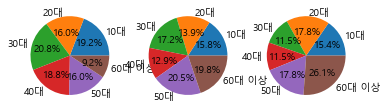

In [121]:
plt.subplot(1,3,1)
seoul_age['운동을 할 충분한 시간이 없어서'].plot.pie(autopct='%.1f%%',ylabel='')
plt.subplot(1,3,2)
seoul_age['함께 운동을 할 사람이 없어서'].plot.pie(autopct='%.1f%%',ylabel='')
plt.subplot(1,3,3)
seoul_age['운동을 할 만한 장소가 없어서'].plot.pie(autopct='%.1f%%',ylabel='')

plt.show()